In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('../data/zoonosis_dataset_test.csv')
train = pd.read_csv('../data/zoonosis_dataset_train_eval.csv')

In [3]:
print(train)

                                            cluster_rep label  TT_p2_Bias_HA  \
0                                          EPI_ISL_8434    nz       1.012299   
1                                         EPI_ISL_33850    nz       1.061313   
2                                         EPI_ISL_28753    nz       1.012368   
3                                         EPI_ISL_64900    nz       1.118025   
4           A/green-winged_teal/Missouri/15OS5246/2015K    nz       1.079232   
...                                                 ...   ...            ...   
1999          A/green-winged_teal/California/K481/2006C    nz       0.941150   
2000                A/green-winged_teal/Egypt/877/2016M    nz       0.959459   
2001  A/green-winged_teal/Interior_Alaska/6MP0909/2006C    nz       1.104354   
2002     A/green-winged_teal/Maryland/UGAI16-5593/2016M    nz       0.985638   
2003       A/green-winged_teal/Minnesota/Sg-01065/2008C    nz       0.966124   

      V_aa_Bias_HA  GGC_Bias_HA  AG_Bia

In [4]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(gbm, threshold=0.03, prefit=True)
selected_dataset = selection.transform(X_test)

NameError: name 'gbm' is not defined

In [ ]:
import xgboost as xgb
    gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train,y_train)
    predictions = gbm.predict(X_test)

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
import time
import matplotlib as pt


In [6]:
X = np.array(train.drop(['cluster_rep', 'label'], axis=1))
y = train['label']

In [7]:
imp = SimpleImputer(missing_values=-2, strategy='mean')
X_norm = imp.fit_transform(X)

In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
time_start = time.time()
n_components = 2  # number of coordinates
# your code here (store the components in X_reduced)
pca = PCA(n_components = n_components)
pca.fit(X_norm)
X_reduced = pca.transform(X_norm)
print('PCA time: {} seconds'.format(time.time()-time_start))
print(X_reduced.shape)
print(X_reduced)


# example code
pca = PCA(n_components=n_components)
X_reduced1=pca.fit_transform(X_norm)
print(X_reduced1.shape)
print(X_reduced1)

PCA time: 0.05507397651672363 seconds
(2004, 2)
[[113.10263691 -21.58492728]
 [113.57343195 -21.18049665]
 [115.0999805  -22.24658196]
 ...
 [ 12.85451713  45.50507874]
 [ 13.83514959  45.67104873]
 [ 13.93479461  43.86934123]]
(2004, 2)
[[113.10263691 -21.58492728]
 [113.57343195 -21.18049665]
 [115.0999805  -22.24658196]
 ...
 [ 12.85451713  45.50507874]
 [ 13.83514959  45.67104873]
 [ 13.93479461  43.86934123]]


In [12]:
import matplotlib.pyplot as plt

In [13]:
# 2D plotting PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
no_of_labels = 2


def plot_reduced_dims(X_reduced, y, no_of_labels, method):
    # you can write above function as just one statement instead of multiple if-elif
    # restructure the data
    df = pd.DataFrame(X_reduced)
    df['categories'] = np.reshape(y, [y.shape[0], 1])
    plt.figure(figsize=(12, 8))

    if method == 'PCA':
        df['pca-one'] = X_reduced[:, 0]
        df['pca-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='pca-one', y='pca-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    # code here for KPCA plots
    elif method == 'KernelPCA':
        df['KPCA-one'] = X_reduced[:, 0]
        df['KPCA-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='KPCA-one', y='KPCA-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'tsne':
        df['tsne-one'] = X_reduced[:, 0]
        df['tsne-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='tsne-one', y='tsne-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'svd':
        df['svd-one'] = X_reduced[:, 0]
        df['svd-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='svd-one', y='svd-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'mds':
        df['mds-one'] = X_reduced[:, 0]
        df['mds-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='mds-one', y='mds-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)
    elif method == 'isomap':
        df['isomap-one'] = X_reduced[:, 0]
        df['isomap-two'] = X_reduced[:, 1]
        sns.scatterplot(
            x='isomap-one', y='isomap-two',
            hue='categories',
            palette=sns.color_palette('hls', no_of_labels),
            data=df.loc[:, :],
            legend='full',
            alpha=1)

    plt.legend(loc='upper right', ncol=6)  # horizontal legend upper right
    plt.show()


In [14]:
y_en = y.replace({'nz': 0, 'hzoon': 1})
y_en = np.array(y_en)

/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_11139/1165430992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_en = y.replace({'nz': 0, 'hzoon': 1})


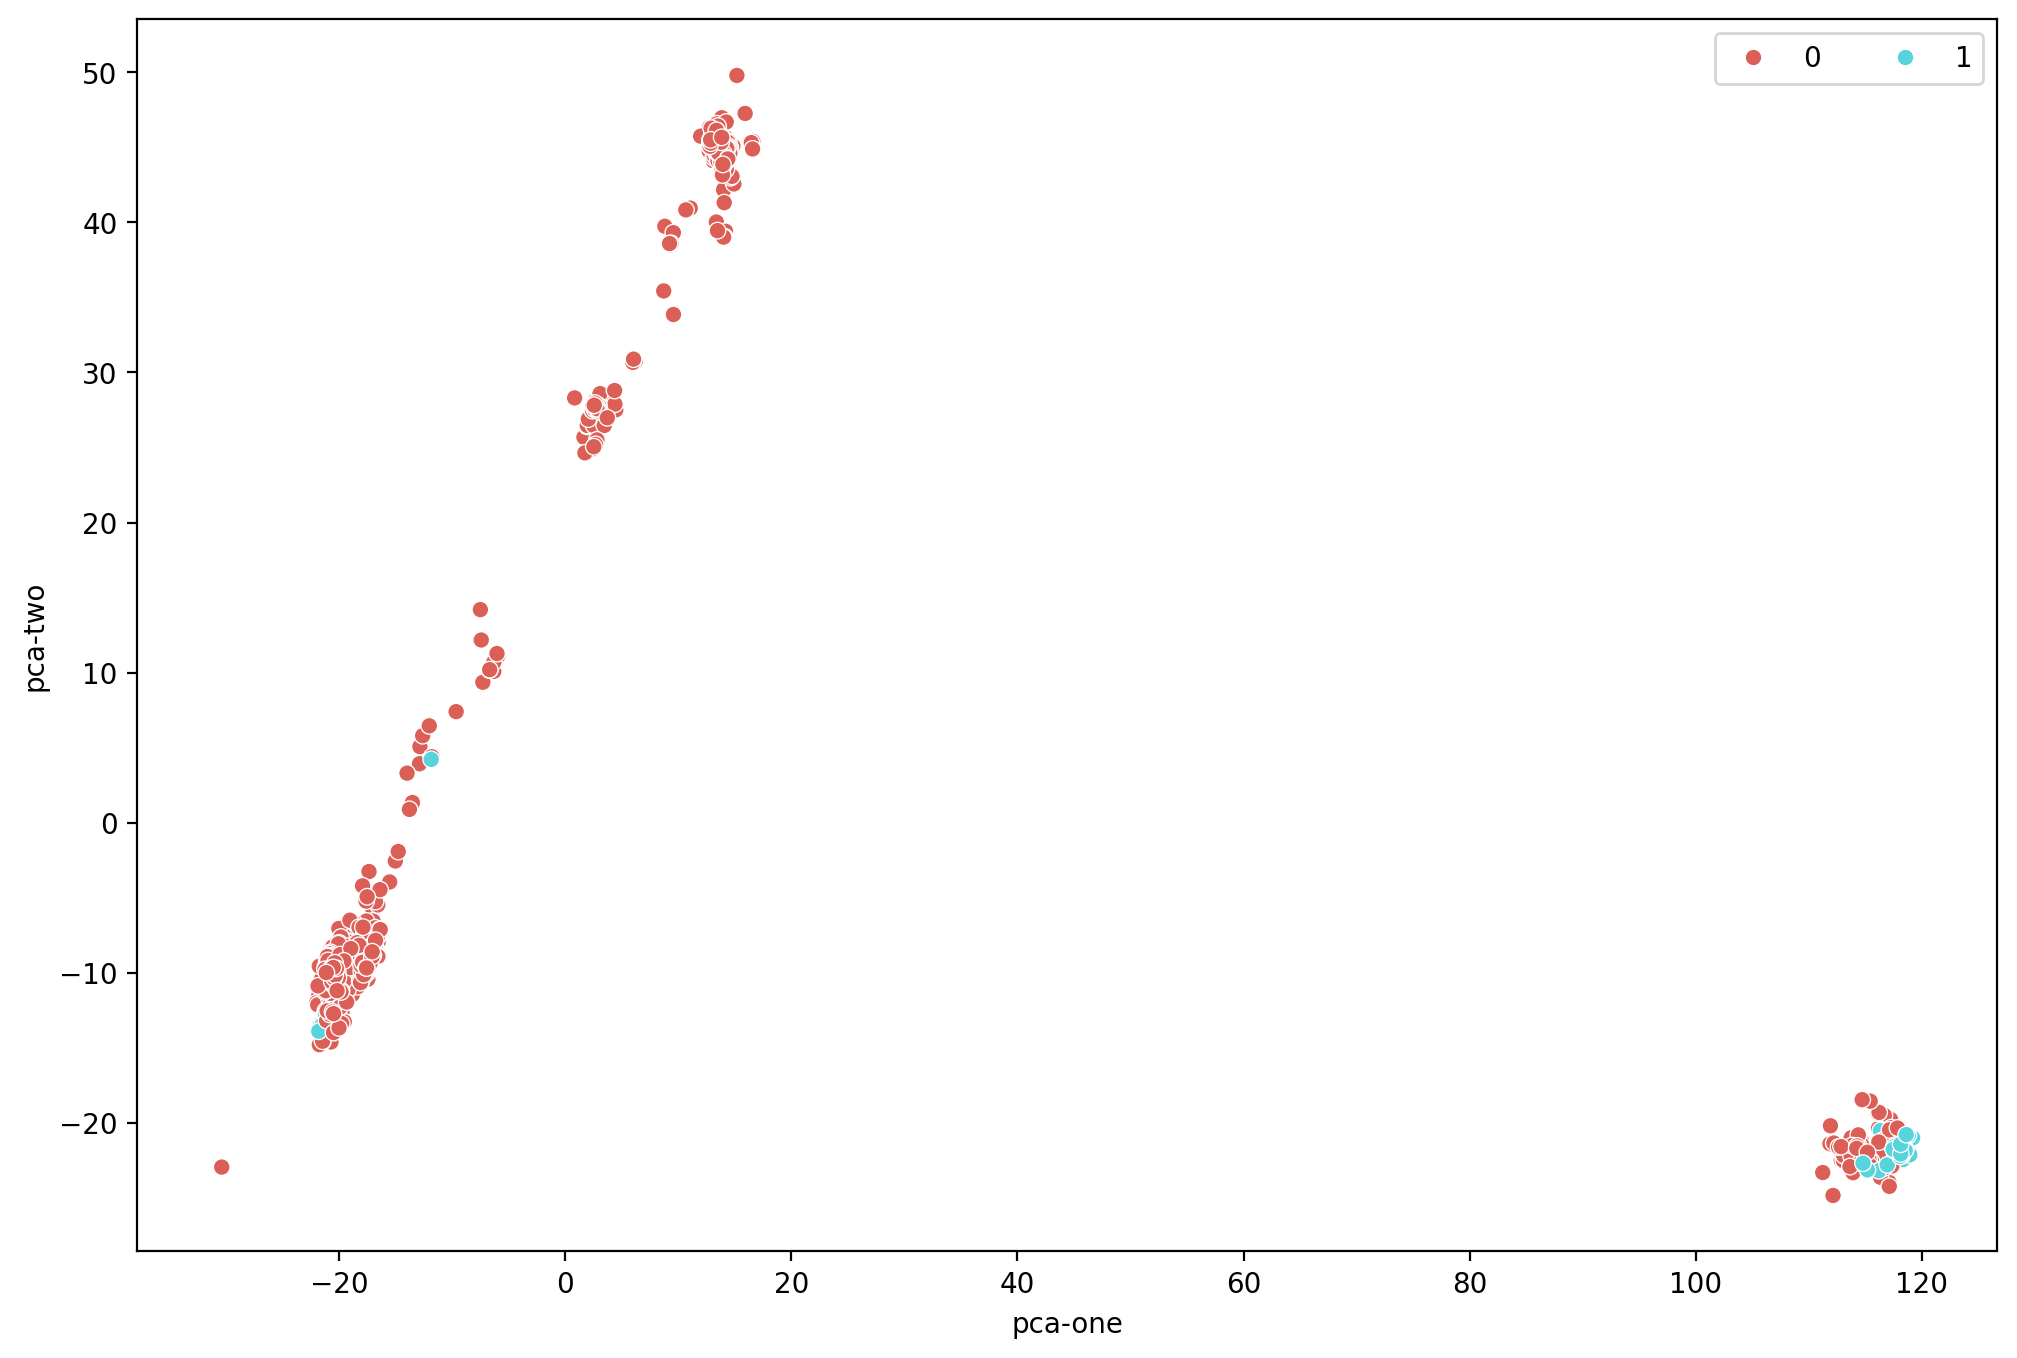

In [15]:
plot_reduced_dims(X_reduced, y_en, 2, 'PCA')
